In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/education")

import numpy as np
import pandas as pd
import time
import shap
from matplotlib import pyplot as plt
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

**1. 读取数据**

In [ ]:
time_0 = time.time()
df = pd.read_csv('undergraduate_2017_tree_encode.csv', low_memory=False)
print('time of opening csv file: %.4f s' % (time.time() - time_0))

df = df[df['S1'] > 0]
df = df[df['S2'] > 0]
df = df[df['S3'] > 0]
df = df[df['S4'] > 0]

A, Y_matrix = df.iloc[:, range(30)], df.iloc[:, range(30, 34)]

**2. 训练XGBoost模型 (计算测试集准确度、绘制全局重要度条形图)**

[08:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 60.2839%


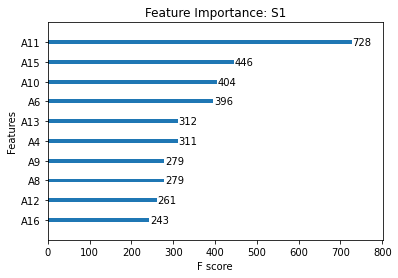

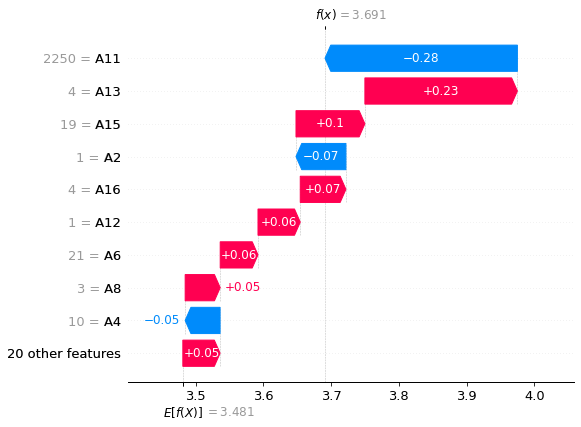

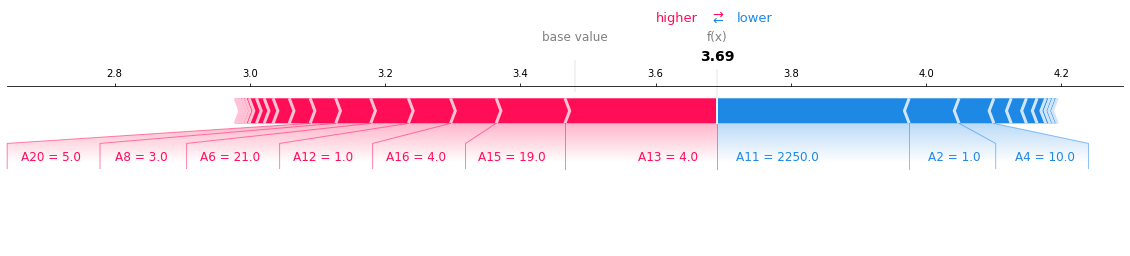

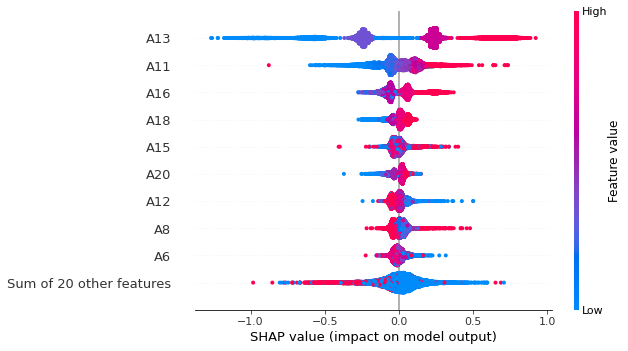

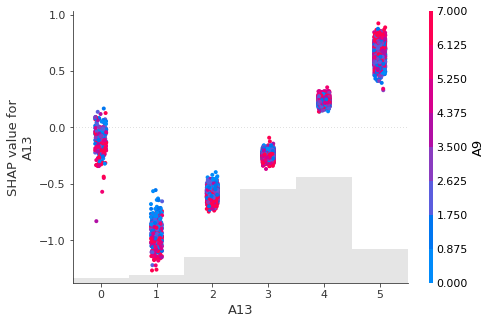

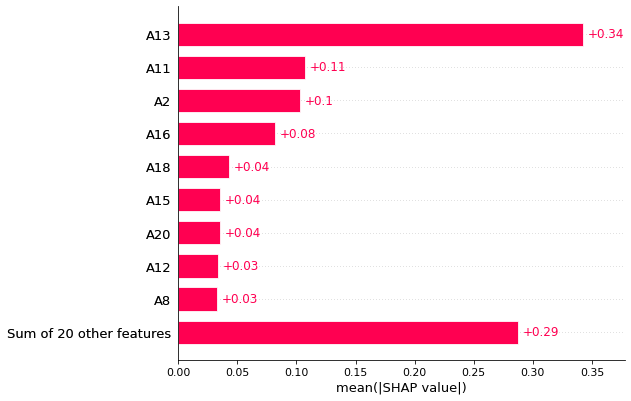

In [ ]:
for i in range(1):
    Y = Y_matrix.iloc[:, i]

    seed = 2
    test_size = 0.8
    A_train, A_test, Y_train, Y_test = train_test_split(A, Y, test_size=test_size, random_state=seed)
    X_train, X_test = A_train.iloc[:, range(1, 30)], A_test.iloc[:, range(1, 30)]

    model = XGBRegressor(learning_rate=0.1,
                        n_estimators=200,
                        max_depth=5,
                        min_child_weight=0.1,
                        gamma=0,
                        subsample=0.8,
                        colsample_bytree=0.8)
    model.fit(X_train, Y_train, eval_metric='auc')

    Y_pred = model.predict(X_test)
    predictions = [round(value) for value in Y_pred]
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy: %.4f%%" % (accuracy * 100.0))

    plot_importance(model, title='Feature Importance: S%i' % (i + 1),
                    grid=False, max_num_features=10)
    plt.savefig('S%i.pdf' % (i + 1), bbox_inches = 'tight')
    plt.show()

    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)

    # visualize the first prediction's explanation
    # (1) waterfall
    shap.plots.waterfall(shap_values[0], show=False)
    plt.savefig('Shap_waterfall%i.pdf' % (i + 1), bbox_inches = 'tight')
    plt.show()
    # (2) force
    shap.plots.force(shap_values[0], show=False, matplotlib=True)
    plt.savefig('Shap_force%i.pdf' % (i + 1), bbox_inches = 'tight')
    plt.show()

    # summarize the effects of all the features
    shap.plots.beeswarm(shap_values, show=False)
    plt.savefig('Shap_beeswarm%i.pdf' % (i + 1), bbox_inches = 'tight')
    plt.show()

    # create a dependence scatter plot to show the effect of a single feature across the whole dataset
    shap.plots.scatter(shap_values[:, "A13"], color=shap_values, show=False)
    plt.savefig('Shap_scatter%i.pdf' % (i + 1), bbox_inches = 'tight')
    plt.show()

    # take the mean absolute value of the SHAP values for each feature
    shap.plots.bar(shap_values, show=False)
    plt.savefig('Shap_bar%i.pdf' % (i + 1), bbox_inches = 'tight')
    plt.show()

**3. 运用Shap解释模型**

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
# (1) waterfall
shap.plots.waterfall(shap_values[0], show=False)
plt.savefig('Shap_waterfall%i.pdf' % (i + 1), bbox_inches = 'tight')
plt.show()
# (2) force
shap.plots.force(shap_values[0], show=False, matplotlib=True)
plt.savefig('Shap_force%i.pdf' % (i + 1), bbox_inches = 'tight')
plt.show()

# summarize the effects of all the features
shap.plots.beeswarm(shap_values, show=False)
plt.savefig('Shap_beeswarm%i.pdf' % (i + 1), bbox_inches = 'tight')
plt.show()

# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "A13"], color=shap_values, show=False)
plt.savefig('Shap_scatter%i.pdf' % (i + 1), bbox_inches = 'tight')
plt.show()

# take the mean absolute value of the SHAP values for each feature
shap.plots.bar(shap_values, show=False)
plt.savefig('Shap_bar%i.pdf' % (i + 1), bbox_inches = 'tight')
plt.show()

In [ ]:
print(A_train.iloc[0, 0])

141244
